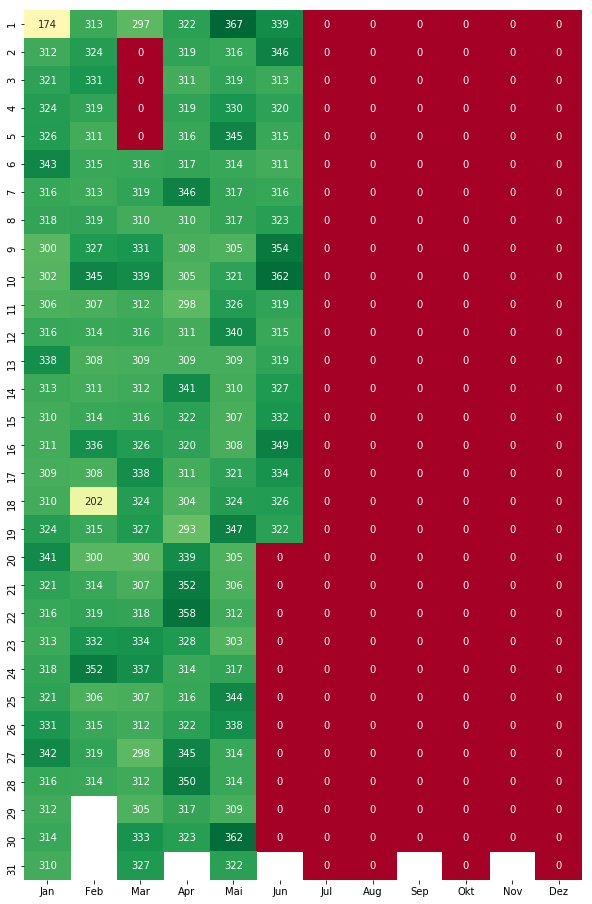

In [73]:
import time
import datetime
import sqlite3
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns  # für das Styling der Ausgabe https://pandas.pydata.org/pandas-docs/stable/style.html#Builtin-Styles


# Ziel: Wie viele Songs wurden am Tag gespielt. Am besten für das ganze Jahr

# Erstmal das heutige Datum feststellen
end_date = datetime.date.today()
start_date = datetime.date(2019, 1, 1)

# Quelle: https://stackoverflow.com/questions/1060279/iterating-through-a-range-of-dates-in-python 
def daterange(start_date, end_date): 
    for n in range(int ((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)


# Daten aus Datenbank laden
connection = sqlite3.connect('../db.sqlite3')
df = pd.read_sql_query("""SELECT bayern3.id, datum_zeit, interpret, titel, label FROM bayern3 
                        INNER JOIN songs ON bayern3.song=songs.id""", connection, index_col='id')
connection.close()

# Spalte mit nur dem Datum hinzufügen
df['datum'] = pd.to_datetime(df['datum_zeit']).dt.date
# Separaten DataFrame für den Vergleich
vergleich = pd.DataFrame()
# Eine Spalte je Kalenderwoche, titel als Index
for single_date in daterange(start_date, end_date):
    vergleich[single_date] = df[df['datum'] == single_date].count()
    
# Alle Zeilen droppen, die NaN enthalten (liegt vor, wenn der Titel in einer Woche nicht gespielt wurde)
#vergleich = vergleich.dropna(how='any')
### Schöne Matrix füllen
ergebnis = np.zeros([31,12])
for monat in range(1,13):
    for tag in range(1,32):
        try: 
            ergebnis[tag-1][monat-1] = vergleich[datetime.date(2019,monat,tag)]['datum_zeit']
        except:
            pass
            
# Erstelle einen Dataframe daraus:
monatsnamen = ['Jan','Feb', 'Mar', 'Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Dez']
ergebnisdf = pd.DataFrame(data=ergebnis, index=range(1,32), columns=monatsnamen)


# Seaborn Bedingte Formatierung
cm = sns.light_palette("green", as_cmap=True)
ergebnisbild = ergebnisdf.style.background_gradient(cmap=cm)

# Seaborn Heatmap
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/users/colormaps.html

# nicht vorhandene Tage maskieren
mask = np.zeros_like(ergebnisdf, dtype=np.bool)
for x in range(0,12):
    for y in range(0,31):
        try: 
            monat = x+1
            tag = y+1
            datetime.datetime(year=2019, month=monat, day=tag)
            mask[y][x] = 0
        except ValueError:
            mask[y][x] = 1

plt.pyplot.figure(figsize=(10, 16))
plt.pyplot.xlabel('Monate')
plt.pyplot.ylabel('Tage')

heatmap = sns.heatmap(ergebnisdf, annot=True, fmt="g", cbar=False, cmap="RdYlGn", mask=mask)

# Heatmap exportieren
savename = 'test-out_'+str(end_date)+'.png'
fig = heatmap.get_figure()
fig.savefig(savename, bbox_inches='tight') 

In [54]:
mask = np.zeros_like(ergebnisdf, dtype=np.bool)
for x in range(0,12):
    for y in range(0,31):
        try: 
            monat = x+1
            tag = y+1
            datetime.datetime(year=2019, month=monat, day=tag)
            mask[y][x] = 0
        except ValueError:
            mask[y][x] = 1
        print(monat,' ',tag, ' ', mask[y][x])

1   1   False
1   2   False
1   3   False
1   4   False
1   5   False
1   6   False
1   7   False
1   8   False
1   9   False
1   10   False
1   11   False
1   12   False
1   13   False
1   14   False
1   15   False
1   16   False
1   17   False
1   18   False
1   19   False
1   20   False
1   21   False
1   22   False
1   23   False
1   24   False
1   25   False
1   26   False
1   27   False
1   28   False
1   29   False
1   30   False
1   31   False
2   1   False
2   2   False
2   3   False
2   4   False
2   5   False
2   6   False
2   7   False
2   8   False
2   9   False
2   10   False
2   11   False
2   12   False
2   13   False
2   14   False
2   15   False
2   16   False
2   17   False
2   18   False
2   19   False
2   20   False
2   21   False
2   22   False
2   23   False
2   24   False
2   25   False
2   26   False
2   27   False
2   28   False
2   29   True
2   30   True
2   31   True
3   1   False
3   2   False
3   3   False
3   4   False
3   5   False
3   6   False
3   7  

In [46]:
type(mask)

numpy.ndarray

In [4]:
abd = pd.DataFrame([{"id":123}])